In [2]:
# importing the necessary library
import numpy as np
import pandas as pd
from models.regression_model import LinearRegression
from evaluation import train_test_split, rmse
import matplotlib.pyplot as plt

In [3]:
data = 'data_cleaned.csv'
df = pd.read_csv(data)
y = df['price'].values  # Assuming 'target_column' is the target variable

# Create and train the model
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']].values

model = LinearRegression(learning_rate=0.01, n_iterations=0)
# Assuming you have already trained your linear regression model and have X, y data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train your linear regression model on the training data (already implemented in your LinearRegression class)
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the RMSE to evaluate the model's performance
accuracy = rmse(y_test, y_pred)
print("Accuracy (RMSE) of the linear model:", accuracy)

Accuracy (RMSE) of the linear model: 678008.8493668694


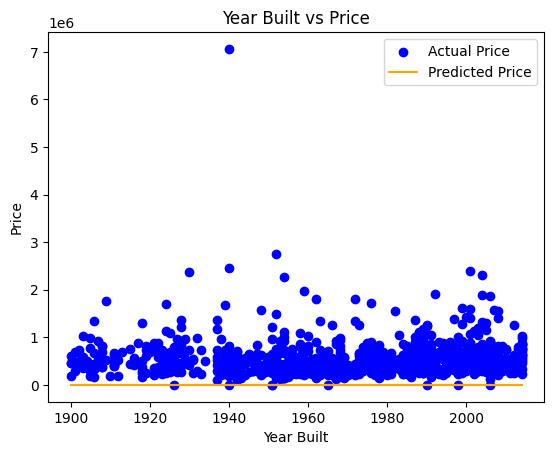

In [4]:
# Extract year_built as NumPy array for plotting
year_built = X_test[:,-2]

# Plot
plt.scatter(year_built, y_test, color='blue', label='Actual Price')
plt.plot(year_built, y_pred, color='orange', label='Predicted Price')
plt.title('Year Built vs Price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Or consider more advanced models

def remove_first_three_letters(cell_value):
    if isinstance(cell_value, str):
        return cell_value[3:]  # Return the substring starting from the 4th character
    else:
        return cell_value  # Return the value unchanged for non-strings

# Apply the function to the 'StateZip' column (assuming it's a string column)
zip_data = df['statezip'].apply(remove_first_three_letters)
zip_data = zip_data.to_numpy()
zip_data = zip_data.reshape(-1,1)

# Assuming 'y' is a Series containing the price values
y = y  # No need to convert y to a DataFrame if it's already a Series

X_train, X_test, y_train, y_test = train_test_split(zip_data, y, test_size=0.2, random_state=42)

linear_model= LinearRegression()
# Train your linear regression model on the training data (already implemented in your LinearRegression class)
linear_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = linear_model.predict(X_test)

# Calculate the RMSE to evaluate the model's performance (consider using metrics like R-squared instead)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate root mean squared error
print("Accuracy (RMSE) of the linear model:", rmse)


Accuracy (RMSE) of the linear model: 1010286.2207810596


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


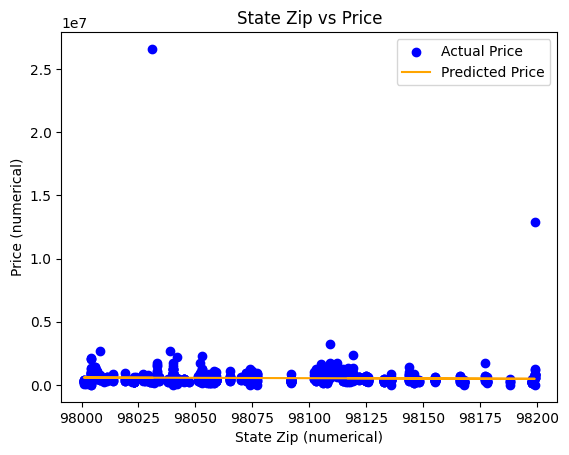

In [16]:
statezip = X_test[:, 0]  # Select the first column (assuming statezip is there)

# Check if statezip can be converted to numerical data (required for plotting)
try:
  # Try converting statezip to numerics
  statezip = statezip.astype(np.float64)
except ValueError:
  print("Error: State zip codes cannot be converted to numbers. Plotting stopped.")
  exit()

# Plot (assuming statezip is numerical after conversion)
plt.scatter(statezip, y_test, color='blue', label='Actual Price')
plt.plot(statezip, y_pred, color='orange', label='Predicted Price')
plt.title('State Zip vs Price')
plt.xlabel('State Zip (numerical)')  # Mention expected data type
plt.ylabel('Price (numerical)')  # Mention expected data type
plt.legend()
plt.show()